In [2]:
import pandas as pd
import numpy as np
import os
import glob
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
df = pd.read_csv('C://Users//nkdge//Desktop//labeled_RecordSession_2021.11.22_13.24.37.csv')

In [6]:
df

,probe1,probe2,probe3,probe4,probe5,probe6,probe7,probe8,target
0,-216810.0,-214310.0,-212790.00,-214200.00,-196570.00,-176920.00,-186330.0,-190650.00,0
1,-213480.0,-211020.0,-209510.00,-210910.00,-193560.00,-174210.00,-183460.0,-187720.00,0
2,-242660.0,-239870.0,-238140.00,-239730.00,-220020.00,-198020.00,-208530.0,-213380.00,0
3,-246600.0,-243770.0,-242000.00,-243620.00,-223590.00,-201240.00,-211910.0,-216850.00,0
4,-217460.0,-214960.0,-213380.00,-214810.00,-197160.00,-177450.00,-186850.0,-191220.00,0
...,...,...,...,...,...,...,...,...,...
31091,1253.5,2317.2,371.72,911.64,257.30,114.51,1181.8,310.35,0
31092,1254.1,2316.8,365.55,909.77,255.07,114.00,1181.3,311.44,0
31093,1257.9,2316.7,363.22,912.48,256.64,116.15,1179.8,308.38,0
31094,1263.6,2318.2,368.26,915.44,260.99,121.67,1183.8,312.46,0


In [7]:
import matplotlib.pyplot as plt

In [8]:
new_df = df.drop(['target'], axis = 'columns')

In [9]:
refined_df = df.iloc[range(0, 31000)]
refined_df

,probe1,probe2,probe3,probe4,probe5,probe6,probe7,probe8,target
0,-216810.0,-214310.0,-212790.00,-214200.00,-196570.00,-176920.000,-186330.0,-190650.00,0
1,-213480.0,-211020.0,-209510.00,-210910.00,-193560.00,-174210.000,-183460.0,-187720.00,0
2,-242660.0,-239870.0,-238140.00,-239730.00,-220020.00,-198020.000,-208530.0,-213380.00,0
3,-246600.0,-243770.0,-242000.00,-243620.00,-223590.00,-201240.000,-211910.0,-216850.00,0
4,-217460.0,-214960.0,-213380.00,-214810.00,-197160.00,-177450.000,-186850.0,-191220.00,0
...,...,...,...,...,...,...,...,...,...
30995,1195.9,2289.5,181.95,829.29,290.62,57.782,1014.5,187.42,0
30996,1196.2,2286.9,193.17,829.93,284.45,55.467,1017.9,189.13,0
30997,1191.9,2284.5,198.60,824.99,280.30,51.843,1011.5,172.91,0
30998,1186.7,2282.4,198.18,823.64,269.90,45.641,1010.6,174.28,0


In [10]:
array = []
for i in range(124):
    array.append(i)
len(array)
print(array)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123]


In [11]:
seg = []
for num in array:
    for i in range(250):
        seg.append(num)

In [12]:
len(seg)

31000

In [13]:
refined_df['groups'] = seg

<ipython-input-13-9b477fa37e43>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined_df['groups'] = seg


In [14]:
refined_df = refined_df.drop(['probe2','probe3','probe4','probe5', 'probe6','probe7','probe8'], axis = 'columns')

In [15]:
refined_df

,probe1,target,groups
0,-216810.0,0,0
1,-213480.0,0,0
2,-242660.0,0,0
3,-246600.0,0,0
4,-217460.0,0,0
...,...,...,...
30995,1195.9,0,123
30996,1196.2,0,123
30997,1191.9,0,123
30998,1186.7,0,123


In [16]:
test_df = refined_df[0:5000]

In [17]:
test_df

,probe1,target,groups
0,-216810.00,0,0
1,-213480.00,0,0
2,-242660.00,0,0
3,-246600.00,0,0
4,-217460.00,0,0
...,...,...,...
4995,-157.09,0,19
4996,-138.77,0,19
4997,-128.32,0,19
4998,-114.96,0,19


In [18]:
lst = []
for i in range(5000):
    lst.append(i)

In [19]:
refined_df = refined_df.drop(lst, axis = 'index')
refined_df

,probe1,target,groups
5000,-98.499,0,20
5001,-88.245,0,20
5002,-77.639,0,20
5003,-67.223,0,20
5004,-54.069,0,20
...,...,...,...
30995,1195.900,0,123
30996,1196.200,0,123
30997,1191.900,0,123
30998,1186.700,0,123


In [20]:
input_shape = [1]
model = keras.Sequential([layers.BatchNormalization(input_shape = input_shape),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          layers.Dropout(0.7),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          #layers.Dropout(0.5),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          #layers.Dropout(0.5),
                          layers.Dense(256, activation = 'relu'),
                          layers.BatchNormalization(),
                          #layers.Dropout(0.5),
                          layers.Dense(1, activation = 'sigmoid')
                         ])

opt = keras.optimizers.Adam()
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [21]:
from sklearn.model_selection import GroupShuffleSplit

x = refined_df.drop(['target','groups'], axis = 'columns')
y = refined_df['target']
groups = refined_df['groups']
gss = GroupShuffleSplit(n_splits = 1, train_size = .8)
for train, test in gss.split(x,y,groups):
    print("Train: ", train, "Test: ", test)
    xtrain, xtest, ytrain, ytest = x.iloc[train], x.iloc[test], y.iloc[train], y.iloc[test]

Train:  [  250   251   252 ... 25997 25998 25999] Test:  [    0     1     2 ... 24747 24748 24749]


In [22]:
#from sklearn.model_selection import train_test_split
#x = df.drop(['target'], axis = 'columns')
#y = df.target
#xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = .7)

In [23]:
xvalid = xtest[0:200]
yvalid = ytest[0:200]

Best Validation Loss: 0.3962
Best Validation Accuracy: 1.0000
Best Loss: 0.5520
Best Accuracy: 0.6976


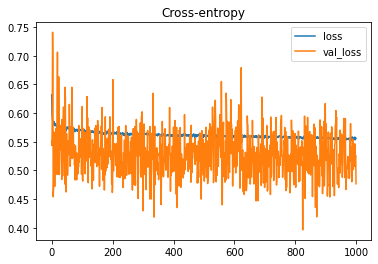

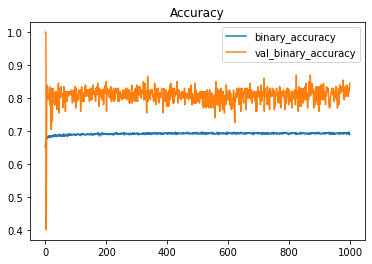

In [24]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.001,
    restore_best_weights=True,
)
history = model.fit(
    xtrain, ytrain,
    validation_data=(xvalid, yvalid),
    batch_size=256,
    epochs=1000,
    #callbacks=[early_stopping],
    verbose = 0
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")
print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))
print(("Best Loss: {:0.4f}" +\
      "\nBest Accuracy: {:0.4f}")\
      .format(history_df['loss'].min(),
              history_df['binary_accuracy'].max()))


In [25]:
history_df['binary_accuracy'].mean()

0.6919012044072151

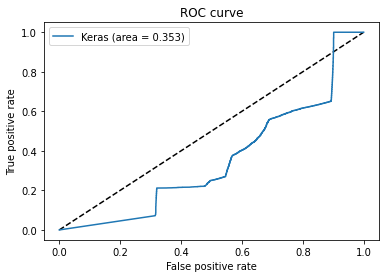

In [26]:
from sklearn.metrics import roc_curve
y_pred_keras = model.predict(test_df.drop(['groups', 'target'], axis = 'columns')).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_df.target, y_pred_keras)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()